In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\rok_2019.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,44.840000,47.209999,44.840000,46.860001,35.153519,1920600
1,2008-08-11,46.869999,48.119999,46.060001,47.730000,35.806183,1046200
2,2008-08-12,48.209999,49.349998,47.599998,48.700001,36.533848,1723800
3,2008-08-13,47.849998,49.070000,47.810001,48.790001,36.601376,1673300
4,2008-08-14,48.130001,49.080002,47.939999,48.459999,36.353813,738500
...,...,...,...,...,...,...,...
2863,2019-12-23,201.919998,204.520004,200.830002,204.300003,200.381027,1001600
2864,2019-12-24,204.660004,204.660004,202.279999,202.839996,198.949020,253900
2865,2019-12-26,203.279999,204.220001,201.369995,204.220001,200.302551,297600
2866,2019-12-27,204.630005,204.720001,202.570007,202.970001,199.076538,451100


In [4]:
df_d = df.reset_index()['Date']

In [5]:
df_d

0       2008-08-08
1       2008-08-11
2       2008-08-12
3       2008-08-13
4       2008-08-14
           ...    
2863    2019-12-23
2864    2019-12-24
2865    2019-12-26
2866    2019-12-27
2867    2019-12-30
Name: Date, Length: 2868, dtype: object

In [6]:
df_h = df.reset_index()['Low']
df_h

0        44.840000
1        46.060001
2        47.599998
3        47.810001
4        47.939999
           ...    
2863    200.830002
2864    202.279999
2865    201.369995
2866    202.570007
2867    202.669998
Name: Low, Length: 2868, dtype: float64

In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2863,2019-12-23,201.919998,204.520004,200.830002,204.300003,200.381027,1001600
2864,2019-12-24,204.660004,204.660004,202.279999,202.839996,198.949020,253900
2865,2019-12-26,203.279999,204.220001,201.369995,204.220001,200.302551,297600
2866,2019-12-27,204.630005,204.720001,202.570007,202.970001,199.076538,451100
2867,2019-12-30,203.289993,204.279999,202.669998,202.929993,199.037277,337000


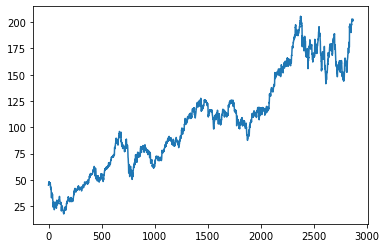

In [8]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))
df_h.shape

(2868, 1)

In [11]:
df_h

array([[0.14526326],
       [0.15174539],
       [0.15992772],
       ...,
       [0.97694059],
       [0.98331651],
       [0.98384778]])

In [12]:
trng_size = int(len(df_h) * 0.8)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size: len(df_h), :1]

In [13]:
len(train_data)

2294

In [14]:
import numpy 
def create_dataset(dataset, time_step = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(x_train)

[[0.14526326 0.15174539 0.15992772 ... 0.06875299 0.06492747 0.06731842]
 [0.15174539 0.15992772 0.16104351 ... 0.06492747 0.06731842 0.07295043]
 [0.15992772 0.16104351 0.16173422 ... 0.06731842 0.07295043 0.07778544]
 ...
 [0.71962168 0.73370167 0.74353114 ... 0.76616541 0.78088303 0.80293284]
 [0.73370167 0.74353114 0.75468885 ... 0.78088303 0.80293284 0.80075448]
 [0.74353114 0.75468885 0.75043834 ... 0.80293284 0.80075448 0.8019765 ]]


In [17]:
print(x_train.shape), print(y_train.shape)

(2193, 100)
(2193,)


(None, None)

In [19]:
print(x_test.shape), print(y_test.shape)

(473, 100)
(473,)


(None, None)

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
model = Sequential()
model.add(LSTM(80, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(120))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 80)           26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          72400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 204,841
Trainable params: 204,841
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 135, batch_size = 64, verbose = 1)

Epoch 1/135
35/35 [==============================] - 12s 355ms/step - loss: 4.4238e-04 - val_loss: 0.0021
Epoch 2/135
35/35 [==============================] - 16s 462ms/step - loss: 4.3317e-04 - val_loss: 0.0020
Epoch 3/135
35/35 [==============================] - 14s 394ms/step - loss: 4.0237e-04 - val_loss: 0.0020
Epoch 4/135
35/35 [==============================] - 13s 372ms/step - loss: 3.9339e-04 - val_loss: 0.0019
Epoch 5/135
35/35 [==============================] - 14s 388ms/step - loss: 4.1539e-04 - val_loss: 0.0022
Epoch 6/135
35/35 [==============================] - 14s 412ms/step - loss: 4.0137e-04 - val_loss: 0.0018
Epoch 7/135
35/35 [==============================] - 13s 377ms/step - loss: 3.7640e-04 - val_loss: 0.0018
Epoch 8/135
35/35 [==============================] - 13s 375ms/step - loss: 3.7555e-04 - val_loss: 0.0021
Epoch 9/135
35/35 [==============================] - 13s 364ms/step - loss: 3.7481e-04 - val_loss: 0.0017
Epoch 10/135
35/35 [==========================

In [42]:
import tensorflow as tf

In [43]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

0.007683192891426076

In [45]:
math.sqrt(mean_squared_error(y_test, predict_test))

0.01721609232116065

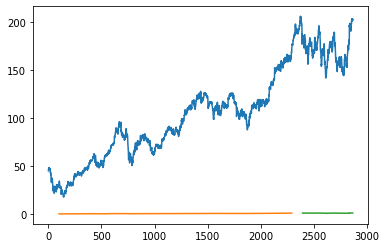

In [46]:
# Shifts train predictions for Plotting 
import numpy
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

574

In [48]:
test_input = test_data[474:].reshape(1, -1)
test_input.shape

(1, 100)

In [49]:
temp_input = list(test_input)
temp_input = temp_input[0].tolist()
temp_input

[0.7190372295135189,
 0.7166993995170511,
 0.7012379315197623,
 0.6996971314070456,
 0.6860421348371767,
 0.6783379908168219,
 0.6882736739922652,
 0.7121831359370809,
 0.7061260775576081,
 0.7097391054238683,
 0.7078263431550692,
 0.6876361149064724,
 0.6716433733515561,
 0.6777535373026153,
 0.675628283675692,
 0.7035757562030163,
 0.7174432494442231,
 0.6823760067125442,
 0.6977843744514605,
 0.7190903297718912,
 0.7457626894408436,
 0.7645714289782688,
 0.7595238918406713,
 0.7573454529439552,
 0.7757823153367185,
 0.7885340761928774,
 0.7828488949580665,
 0.7663779801038952,
 0.7651027822341029,
 0.7728601115242507,
 0.7668561534031503,
 0.7572392471139964,
 0.7604271275543811,
 0.7496413089236003,
 0.7689814070300734,
 0.7730726028823748,
 0.7571860671574173,
 0.768184456844529,
 0.7241378669094889,
 0.7202592474267322,
 0.7406088614618668,
 0.7402369790039909,
 0.7181870940581814,
 0.7197279738691046,
 0.7178683171718919,
 0.7468784962108842,
 0.7607990897104635,
 0.778013854491

In [50]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        test_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,test_input))
        test_input=test_input.reshape(1, -1)
        test_input=test_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(test_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        test_input = test_input.reshape((1, n_steps,1))
        yhat = model.predict(test_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)

[0.9697302]
101
1 day input [0.7166994  0.70123793 0.69969713 0.68604213 0.67833799 0.68827367
 0.71218314 0.70612608 0.70973911 0.70782634 0.68763611 0.67164337
 0.67775354 0.67562828 0.70357576 0.71744325 0.68237601 0.69778437
 0.71909033 0.74576269 0.76457143 0.75952389 0.75734545 0.77578232
 0.78853408 0.78284889 0.76637798 0.76510278 0.77286011 0.76685615
 0.75723925 0.76042713 0.74964131 0.76898141 0.7730726  0.75718607
 0.76818446 0.72413787 0.72025925 0.74060886 0.74023698 0.71818709
 0.71972797 0.71786832 0.7468785  0.76079909 0.77801385 0.78295519
 0.78917164 0.79156257 0.8089368  0.80925558 0.81196536 0.82020078
 0.83061472 0.83964717 0.83459963 0.82046646 0.81499385 0.82785183
 0.85792463 0.86849796 0.85107054 0.85107054 0.84357897 0.84660746
 0.95021513 0.94075762 0.95414694 0.96078846 0.95319052 0.94500821
 0.94192653 0.94054512 0.93831358 0.93974809 0.93767594 0.94453003
 0.94219221 0.93656021 0.91764519 0.94075762 0.94479571 0.95829124
 0.96031028 0.95552834 0.97098982 

In [51]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131)

In [52]:
import matplotlib.pyplot as plt

In [54]:
len(df_h)

2868

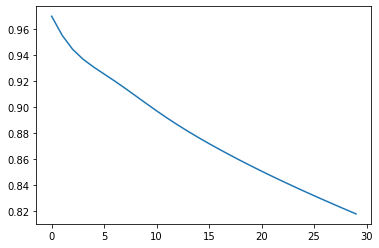

In [55]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[2868:])

In [56]:
df_final = scaler.inverse_transform(df_final).tolist()

In [57]:
df_final[2868:]

[[200.0129274258382],
 [197.25900746746078],
 [195.22691076571948],
 [193.79100480396838],
 [192.66632510432186],
 [191.66033386133344],
 [190.651291270499],
 [189.59782464484735],
 [188.50801108161798],
 [187.41087203991998],
 [186.3349690330475],
 [185.29893547560442],
 [184.3099173550096],
 [183.36675919763007],
 [182.46397530825743],
 [181.59531715472164],
 [180.7551419871457],
 [179.9397029298657],
 [179.14640858085062],
 [178.37314992026575],
 [177.61850223790356],
 [176.88105204174713],
 [176.1593634033983],
 [175.45204526722142],
 [174.757527086531],
 [174.0745412057881],
 [173.40184240583494],
 [172.73848835866025],
 [172.08385084558984],
 [171.43714459328098]]